In [17]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

#sns.set(style='whitegrid', palette='muted', font_scale=1.5)

#rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

In [41]:
columns = ['x-axis', 'y-axis','z-axis','xg-axis', 'yg-axis','zg-axis','activity']
df=pd.read_csv("/home/opensenselabs/django_final/buttonpython/Sample1_sub1_noise.csv")

In [42]:
df

,x-axis,y-axis,z-axis,xg-axis,yg-axis,zg-axis,activity
0,0.0671,-0.0520,0.0955,-4.2073,1.7683,-21.3415,1
1,0.0601,-0.0527,0.0966,-4.1463,-7.2561,-21.4024,1
2,0.0571,-0.0510,0.0950,-0.9146,-6.2805,-22.0122,1
3,0.0590,-0.0516,0.0954,-0.4878,-3.7805,-22.1951,1
4,0.0622,-0.0497,0.0983,-0.6098,-4.0244,-21.3415,1
5,0.0692,-0.0465,0.1039,-1.2195,-6.5854,-21.7073,1
6,0.0745,-0.0435,0.1077,-3.7195,-6.5244,-21.2195,1
7,0.0814,-0.0450,0.1077,-6.2805,-4.5732,-20.5488,1
8,0.0842,-0.0470,0.1053,-8.2927,-0.4878,-18.6585,1
9,0.0831,-0.0472,0.1022,-9.2683,5.1829,-16.0366,1


In [43]:
tf.__version__

'1.14.0'

In [44]:
df.shape

(7934, 7)

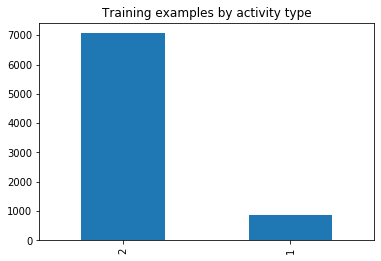

In [45]:
df['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [46]:
N_TIME_STEPS = 500
N_FEATURES = 6
step = 100
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]
    xsg = df['xg-axis'].values[i: i + N_TIME_STEPS]
    ysg = df['yg-axis'].values[i: i + N_TIME_STEPS]
    zsg = df['zg-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    #print label
    segments.append([xs, ys, zs, xsg, ysg, zsg])
    labels.append(label)
    #print labels

In [47]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [48]:
reshaped_segments.shape

(75, 500, 6)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [50]:
X_train.shape

(60, 500, 6)

In [54]:
X_test.shape

(15, 500, 6)

In [55]:
N_CLASSES = 3
N_HIDDEN_UNITS = 64

In [56]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden =tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [57]:
#tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [71]:
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")

ValueError: in converted code:
    relative to /home/opensenselabs/anaconda3/lib/python3.7/site-packages/tensorflow/python:

    ops/rnn_cell_impl.py:1719 call *
        cur_inp, new_state = cell(cur_inp, cur_state)
    ops/rnn_cell_impl.py:385 __call__
        self, inputs, state, scope=scope, *args, **kwargs)
    layers/base.py:537 __call__
        outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
    keras/engine/base_layer.py:591 __call__
        self._maybe_build(inputs)
    keras/engine/base_layer.py:1881 _maybe_build
        self.build(input_shapes)
    keras/utils/tf_utils.py:295 wrapper
        output_shape = fn(instance, input_shape)
    ops/rnn_cell_impl.py:734 build
        shape=[input_depth + h_depth, 4 * self._num_units])
    keras/engine/base_layer.py:1484 add_variable
        return self.add_weight(*args, **kwargs)
    layers/base.py:450 add_weight
        **kwargs)
    keras/engine/base_layer.py:384 add_weight
        aggregation=aggregation)
    training/tracking/base.py:663 _add_variable_with_custom_getter
        **kwargs_for_getter)
    ops/variable_scope.py:1496 get_variable
        aggregation=aggregation)
    ops/variable_scope.py:1239 get_variable
        aggregation=aggregation)
    ops/variable_scope.py:545 get_variable
        return custom_getter(**custom_getter_kwargs)
    ops/rnn_cell_impl.py:251 _rnn_get_variable
        variable = getter(*args, **kwargs)
    ops/variable_scope.py:514 _true_getter
        aggregation=aggregation)
    ops/variable_scope.py:864 _get_single_variable
        (err_msg, "".join(traceback.format_list(tb))))

    ValueError: Variable rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:
    
      File "/tmp/tmpcn1i7aw4.py", line 53, in loop_body
        cur_inp_1, new_state = ag__.converted_call(cell, None, ag__.ConversionOptions(recursive=True, force_conversion=False, optional_features=(), internal_convert_user_code=True), (cur_inp_1, cur_state), None)
      File "/tmp/tmpcn1i7aw4.py", line 56, in tf__call
        cur_inp, cur_state_pos = ag__.for_stmt(ag__.converted_call(enumerate, None, ag__.ConversionOptions(recursive=True, force_conversion=False, optional_features=(), internal_convert_user_code=True), (self._cells,), None), None, loop_body, (cur_inp, cur_state_pos))
      File "<ipython-input-30-ff9d035b2db5>", line 21, in create_LSTM_model
        outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)
      File "<ipython-input-32-977dd1d935e6>", line 1, in <module>
        pred_Y = create_LSTM_model(X)
      File "/home/opensenselabs/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
        exec(code_obj, self.user_global_ns, self.user_ns)
    


In [34]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [35]:
LEARNING_RATE = 0.0001

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [69]:
N_EPOCHS = 20
BATCH_SIZE = 64

In [70]:
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    #if i != 1 and i % 10 != 0:
        #continue

    print("epoch " + str(i) + ":  "+ "test accuracy:" + " " + str(acc_test) + " " + "loss:" + str(loss_test))
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

#print()
print("final results: accuracy:   " + str(acc_final) + "\t" +  "loss:  " +str(loss_final))

/home/opensenselabs/anaconda3/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


ValueError: Cannot feed value of shape (60, 2) for Tensor 'Placeholder_1:0', which has shape '(?, 3)'

In [21]:
pickle.dump(predictions, open("predictions_task1.p", "wb"))
pickle.dump(history, open("history_task1.p", "wb"))
tf.train.write_graph(sess.graph_def, '.', './checkpoint/activity_task1.pbtxt')  
saver.save(sess, save_path = "./checkpoint/activity_tesk1.ckpt")
sess.close()

In [22]:
history = pickle.load(open("history_task1.p", "rb"))
predictions = pickle.load(open("predictions_task1.p", "rb"))

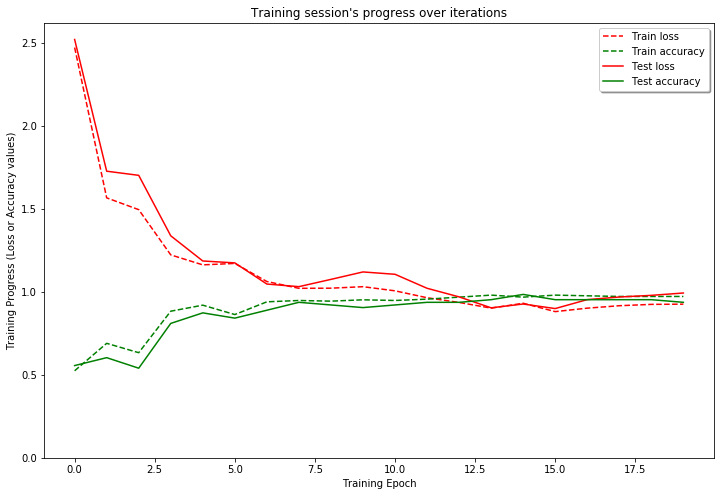

In [23]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

In [24]:
#activity
LABELS = ['task1','walking','sitting']

In [25]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [26]:
#max_test = np.argmax(y_test, axis=1)
#ls = list(max_test)
#ls


In [26]:
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)

max_test1 = max_test.tolist()
print (max_test1)
print (type(max_test1))
max_predictions1 = max_predictions.tolist()
print(max_predictions1)

confusion_matrix(max_test1, max_predictions1)


[2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0]
<class 'list'>
[2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0]


array([[34,  1,  0],
       [ 0, 11,  0],
       [ 3,  0, 14]])

In [28]:
def data_reshaping(df):
    #df['activity'].value_counts().plot(kind='bar', title='Testing examples by activity type');
    N_TIME_STEPS = 500
    N_FEATURES = 6
    step = 100
    segments = []
    test_labels = []
    for i in range(0, len(df) - N_TIME_STEPS, step):
        xs = df['x-axis'].values[i: i + N_TIME_STEPS]
        ys = df['y-axis'].values[i: i + N_TIME_STEPS]
        zs = df['z-axis'].values[i: i + N_TIME_STEPS]
        xsg = df['xg-axis'].values[i: i + N_TIME_STEPS]
        ysg = df['yg-axis'].values[i: i + N_TIME_STEPS]
        zsg = df['zg-axis'].values[i: i + N_TIME_STEPS]
        
        label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
        segments.append([xs, ys, zs, xsg, ysg,zsg])
        test_labels.append(label)
    #print test_labels
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
    #test_labels = np.asarray(pd.get_dummies(test_labels), dtype = np.float32)
    #X_train, X_test, y_train, y_test = train_test_split(
        #reshaped_segments, test_labels, test_size=0.99, random_state=RANDOM_SEED)
    X_test = reshaped_segments
    y_test = test_labels
    
    #print test_labels
    return X_test, y_test
    

In [29]:
test = pd.read_csv('test_raj.csv', header = None, names = columns)

In [30]:
x_test1, y_test1 = data_reshaping(test)

In [ ]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    saver = tf.train.import_meta_graph("./checkpoint/activity_tesk1.ckpt.meta")
    saver.restore(sess,tf.train.latest_checkpoint("./checkpoint"))
    predictions1= sess.run(pred_softmax, feed_dict={X: x_test1})
    #predictions, acc_final, loss_final = sess.run([pred_softmax, a, feed_dict={X: X_test1, Y: y_test1})
    sess.close()

In [ ]:
y_ls = list(y_test1)
print(y_ls)

In [ ]:
max_predictions1 = np.argmax(predictions1, axis=1) + 1
print(list(max_predictions1))

In [ ]:
columns = ['time','x-axis', 'y-axis','z-axis','xg-axis', 'yg-axis','zg-axis','activity']
df_time = pd.read_csv('test_raj_time.csv', header = None, names = columns)

In [ ]:
time = df_time['time']

In [ ]:
single_task_list = []

In [ ]:
pred_list = list(max_predictions1)
activity = []
temp = ['activity name','start time','End time','Accuracy']
activity.append(temp)

In [ ]:
i = 400
for items in pred_list:
    i+=100
    if len(single_task_list) == 6:
        if single_task_list.count(1) >= single_task_list.count(2):
            accuracy = single_task_list.count(1) *100 / 6
            ls = []
            ls.append(1)
            ls.append(time[i-500])
            ls.append(time[i])
            ls.append(accuracy)
            activity.append(ls)
        single_task_list =[]
    else:
        single_task_list.append(items)
        

In [ ]:
for items in activity:
    print (items)